In [7]:
import pandas as pd
import numpy as np

In [47]:
#Test battle_results_with_weakness

battle_results_with_weakness = catalog.load("battle_results_with_weakness")

2020-05-30 20:58:00,549 - kedro.io.data_catalog - INFO - Loading data from `battle_results_with_weakness` (CSVDataSet)...


/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func()


In [5]:
battle_results_with_weakness.keys()

Index(['Name_1', 'Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Name_2', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2', 'WeatherAndTime', 'BattleResult', 'ID_1',
       'Type_1_1', 'Type_2_1', 'ID_2', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
       'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
       'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
       'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
       'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
       'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
       'WeatherAndTime_d', 'WeatherAndTime_e', 'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2b

In [43]:
import logging
from typing import Dict, List

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split


def split_data(data: pd.DataFrame, parameters: Dict) -> List:
    """Splits data into training and test sets.

        Args:
            data: Source data.
            parameters: Parameters defined in parameters.yml.

        Returns:
            A list containing split data.

    """
    X = data[
        [   'Level_1', 
            #'Price_1', 
            'HP_1', 
            'Attack_1', 
            'Defense_1',
            'Sp_Atk_1', 
            'Sp_Def_1', 
            'Speed_1', 
            'Legendary_1',
         
            'A1/D2',
            'A2/D1',
            'Sp_A1/Sp_D2',
            'Sp_A2/Sp_D1',
         
            'Eff_11',
            'Eff_12',
            'Eff_21',
            'Eff_22',
            'Eff',

            'Level_2',
            #'Price_2', 
            'HP_2', 
            'Attack_2', 
            'Defense_2', 
            'Sp_Atk_2', 
            'Sp_Def_2',
            'Speed_2', 
            'Legendary_2', 
         
            'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
            'WeatherAndTime_d', 'WeatherAndTime_e',
         
            'Type_1_1_a', 'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 
            'Type_1_2_a', 'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 
            'Type_2_1_a', 'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 
            'Type_2_2_a', 'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
         #0,1,2,3,4,
         # 'WeatherAndTime',
        ]
    ].values
    y = data["BattleResult"].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=parameters["test_size"], random_state=parameters["random_state"]
    )

    return [X_train, X_test, y_train, y_test]


def train_model(X_train: np.ndarray, y_train: np.ndarray) -> LinearRegression:
    """Train the linear regression model.

        Args:
            X_train: Training data of independent features.
            y_train: Training data for price.

        Returns:
            Trained model.

    """
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor


def evaluate_model(regressor: LinearRegression, X_test: np.ndarray, y_test: np.ndarray):
    """Calculate the coefficient of determination and log the result.

        Args:
            regressor: Trained model.
            X_test: Testing data of independent features.
            y_test: Testing data for price.

    """
    y_pred = regressor.predict(X_test)
    print(y_pred, y_test, sum((y_pred-y_test)**2)/len(y_test))
    score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test,y_pred) 
    
    logger = logging.getLogger(__name__)
    logger.info("Model has a coefficient R^2 of %.3f.", score)
    logger.info("and a Mean Squared Error of %.3f.", MSE )
#     plt.scatter(X_test, y_test)

    #Plot for actual and prediction
    a = plt.axes(aspect='equal')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actuals [BattleResult]')
    plt.ylabel('Predictions [BattleResult]')
    lims = [-2500,2500]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, c="orange")
    plt.show()

#     plt.scatter(y_test, y_pred)#, color='red')
#     plt.show()

In [40]:
params = dict({'test_size': 0.2, 'random_state': 3})

X_train, X_test, y_train, y_test = split_data(battle_results_with_weakness, params)

In [41]:
regressor = train_model(X_train, y_train)

In [42]:
evaluate_model(regressor, X_test, y_test)

[ 154.00194036  -84.81605043 -209.50868495 ...  121.66232666  824.25864805
  372.79787133] [ 170  -60 -249 ...  147  647  584] [  255.93791238   615.83635908  1559.56396437 ...   641.99769012
 31420.62830769 44606.33915684]
2020-05-30 19:38:38,591 - __main__ - INFO - Model has a coefficient R^2 of 0.897.


In [1]:
# Now for the Data with differences and ratios

battle_results_diff_ratio = catalog.load("battle_results_diff_ratio")

2020-05-30 21:05:22,507 - kedro.io.data_catalog - INFO - Loading data from `battle_results_diff_ratio` (CSVDataSet)...


/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func()


In [12]:
battle_results_diff_ratio.keys()

Index(['Name_1', 'Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Name_2', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2', 'WeatherAndTime', 'BattleResult', 'ID_1',
       'Type_1_1', 'Type_2_1', 'ID_2', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
       'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
       'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
       'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
       'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
       'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
       'WeatherAndTime_d', 'WeatherAndTime_e', 'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2b

In [49]:
import logging
from typing import Dict, List

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def split_data(data: pd.DataFrame, parameters: Dict) -> List:
    """Splits data into training and test sets.

        Args:
            data: Source data.
            parameters: Parameters defined in parameters.yml.

        Returns:
            A list containing split data.

    """
    X = data[
         [
            'Level_1', 
            'Price_1', 
            'HP_1', 
            'Attack_1', 
            'Defense_1',
            'Sp_Atk_1', 
            'Sp_Def_1', 
            'Speed_1', 
            'Legendary_1',
         
            'A1/D2',
            'A2/D1',
            'Sp_A1/Sp_D2',
            'Sp_A2/Sp_D1',
             
            'value_1_1ab', 'value_1_1ba', 
            'value_1_2ab', 'value_2_1ba', 
            'value_2_1ab', 'value_1_2ba',
            'value_2_2ab', 'value_2_2ba',
         
            'Eff_11',
            'Eff_12',
            'Eff_21',
            'Eff_22',
            'Eff',

            'Level_2',
            'Price_2', 
            'HP_2', 
            'Attack_2', 
            'Defense_2', 
            'Sp_Atk_2', 
            'Sp_Def_2',
            'Speed_2', 
            'Legendary_2', 
         
            'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
            'WeatherAndTime_d', 'WeatherAndTime_e',
         
            'Type_1_1_a', 'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 
            'Type_1_2_a', 'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 
            'Type_2_1_a', 'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 
            'Type_2_2_a', 'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
         
         
            'Level Diff',
            'Level Ratio', 'Price Diff', 'Price Ratio', 'HP Diff', 'HP Ratio',
            'Attack Diff', 'Attack Ratio', 'Defense Diff', 'Defense Ratio',
            'Sp_Atk Diff', 'Sp_Atk Ratio', 'Sp_Def Diff', 'Sp_Def Ratio',
            'Speed Diff', 'Speed Ratio', 'A/D Diff', 'A/D Ratio', 'Sp_A/Sp_D Diff',
            'Sp_A/Sp_D Ratio', 'Legendary Diff', 'Eff_11 Diff', 'Eff_12 Diff',
            'Eff_21 Diff', 'Eff_22 Diff', 'Eff Diff'
         #0,1,2,3,4,
         # 'WeatherAndTime',
        ]
    ].values
    y = data["BattleResult"].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=parameters["test_size"], random_state=parameters["random_state"]
    )

    return [X_train, X_test, y_train, y_test]

In [50]:
params = dict({'test_size': 0.2, 'random_state': 3})

X_train_diff, X_test_diff, y_train_diff, y_test_diff = split_data(battle_results_diff_ratio, params)

In [51]:
regressor = train_model(X_train_diff, y_train_diff)

[ 158.65935723  -34.88751777 -226.24689277 ...  185.22185723  790.59685723
  548.87810723] [ 170  -60 -249 ...  147  647  584] 21771.87677193444
2020-05-30 21:48:02,742 - __main__ - INFO - Model has a coefficient R^2 of 0.907.
2020-05-30 21:48:02,745 - __main__ - INFO - and a Mean Squared Error of 21771.877.


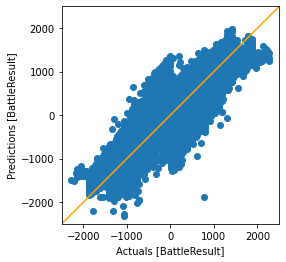

In [52]:
evaluate_model(regressor, X_test_diff, y_test_diff)

In [20]:
print(y_pred)

NameError: name 'y_pred' is not defined

In [40]:
print(np.shape(X_test_diff[:,0]), np.shape(y_test_diff) )

(543833,) (543833,)


In [38]:
X_test_diff[:][0]

array([ 5.60000000e+01,  1.70000000e+02,  3.03000000e+02,  1.70000000e+02,
        1.31000000e+02,  1.31000000e+02,  2.73000000e+02,  0.00000000e+00,
        4.09459459e+00,  5.29411765e-01,  1.48863636e+00,  7.86259542e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.50000000e+01,  8.60000000e+01,  9.00000000e+01,
        7.40000000e+01,  1.03000000e+02,  8.80000000e+01,  1.09000000e+02,
        0.00000000e+00, -1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
       -1.00000000e+00, -2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
       -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        0.00000000e+00, -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.10000000e+01,  2.24000000e+00,
        6.28000000e+02,  